In [1]:
import sys
sys.path.append('..')

import numpy as np
import numpy.random as npr
import math

import torch
import torch.nn as nn
import torch.nn.functional as F

from fail.utils.harmonics import spherical_harmonics
import matplotlib.pyplot as plt

In [2]:
lmax = 3
model = nn.Sequential(
    nn.Linear(1, 8),
    nn.ReLU(inplace=True),
    nn.Linear(8, 5*lmax + 1)
)

In [3]:
with torch.no_grad():
    w = model(torch.rand(1,1))

In [59]:
Es = list()
X = np.linspace(-1,1,5)
Y = np.linspace(-1,1,5)
Z = np.linspace(-1,1,5)

xyz = list()
for x in X:
    for y in Y:
        for z in Z:
            xyz.append(F.normalize(torch.tensor([[x,y,z]]), dim=-1))
            B = spherical_harmonics(lmax, torch.tensor([[x, y, z]])).unsqueeze(2).float()
            Es.append(torch.bmm(w.unsqueeze(1), B).squeeze())
Es = torch.stack(Es)

In [60]:
xyz = np.stack(xyz).squeeze()
print(xyz.shape)

(125, 3)


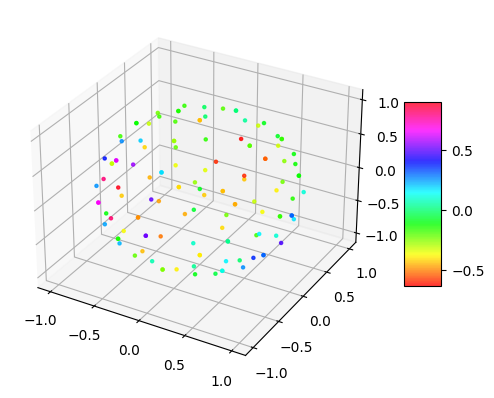

In [61]:
E = Es.tolist()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2],
                    alpha = 0.8,
                    c=Es, 
                    cmap = my_cmap, 
                    marker ='.')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

In [27]:
np.meshgrid(X,Y,Z)[0].shape

(10, 10, 10)

array([-1.,  1.])